In [1]:
import pandas as pd
import numpy as np

In [3]:
pop = pd.Series([33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561], index=['a','b','c','d','e','f'])
pop

a    33871648
b    37253956
c    18976457
d    19378102
e    20851820
f    25145561
dtype: int64

In [4]:
index=['a','b','c','d','e','f']
pop = pd.Series([33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561], index=index)
pop

a    33871648
b    37253956
c    18976457
d    19378102
e    20851820
f    25145561
dtype: int64

In [6]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [7]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [18]:
l = []
for i in pop.index:
    if i[1] == 2010:
        l.append(pop[i])
print(l)

[37253956, 19378102, 25145561]


In [22]:
l = [[pop[i] for i in pop.index if i[1] == 2010]]
l

[[37253956, 19378102, 25145561]]

In [23]:
pop[[('California', 2010),('New York', 2010),('Texas', 2010)]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [8]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [24]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [25]:
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [26]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [27]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [28]:
pop_df = pop.unstack() # DataFrame
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [29]:
pop_sir = pop_df.stack() # Series
pop_sir

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [30]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [31]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [33]:
pop_df['under18'], pop_df['total']

(California  2000    9267089
             2010    9284094
 New York    2000    4687374
             2010    4318033
 Texas       2000    5906301
             2010    6879014
 Name: under18, dtype: int64,
 California  2000    33871648
             2010    37253956
 New York    2000    18976457
             2010    19378102
 Texas       2000    20851820
             2010    25145561
 Name: total, dtype: int64)

In [34]:
pop_df['under18'] / pop_df['total']

California  2000    0.273594
            2010    0.249211
New York    2000    0.247010
            2010    0.222831
Texas       2000    0.283251
            2010    0.273568
dtype: float64

In [35]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


In [37]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'b', 'c', 'd']],
                  columns=['data1', 'data2'])
df

,data1,data2
a,0.372098,0.085591
b,0.084675,0.286240
c,0.901390,0.172750
d,0.349397,0.756599


In [38]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.952205  0.615174
  2  0.302616  0.640841
b 1  0.029379  0.412722
  2  0.365404  0.554133

In [39]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [45]:
# 계층적 인덱스와 열
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# 일부 데이터 모형 만들기
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# DataFrame 생성하기
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      24.0  36.9  41.0  37.7  45.0  36.8
     2      39.0  35.8  35.0  38.8  38.0  36.2
2014 1      40.0  37.2  28.0  38.1  37.0  37.6
     2      40.0  35.4  44.0  36.7  48.0  38.0

In [49]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      41.0  37.7
     2      35.0  38.8
2014 1      28.0  38.1
     2      44.0  36.7

In [52]:
health_data['Guido', 'HR']

year  visit
2013  1        41.0
      2        35.0
2014  1        28.0
      2        44.0
Name: (Guido, HR), dtype: float64

In [53]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [55]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [54]:
pop['California', 2000]

33871648

In [56]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [57]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [61]:
# 모든 데이터에서 22000000보다 큰 데이터만 출력하시오.
pop > 22000000 # 마스크

state       year
California  2000     True
            2010     True
New York    2000    False
            2010    False
Texas       2000    False
            2010     True
dtype: bool

In [62]:
pop[pop > 22000000] # 마스킹

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [63]:
# California, Texas 데이터를 가지고 오시오. Fancy Indexing
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

In [64]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      24.0  36.9  41.0  37.7  45.0  36.8
     2      39.0  35.8  35.0  38.8  38.0  36.2
2014 1      40.0  37.2  28.0  38.1  37.0  37.6
     2      40.0  35.4  44.0  36.7  48.0  38.0

In [65]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      24.0  36.9
     2      39.0  35.8

In [67]:
health_data.loc[:, ('Guido', 'Temp')]

year  visit
2013  1        37.7
      2        38.8
2014  1        38.1
      2        36.7
Name: (Guido, Temp), dtype: float64

In [70]:
health_data.loc[(:, 1), (:, 'HR')]

SyntaxError: invalid syntax (3311942670.py, line 1)

In [73]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,24.0,41.0,45.0
2014,1,40.0,28.0,37.0


In [76]:
#health_data.loc[idx[2013, :], idx[:]]
health_data.loc[idx[2013, :]]

subject   Bob       Guido         Sue      
type       HR  Temp    HR  Temp    HR  Temp
visit                                      
1        24.0  36.9  41.0  37.7  45.0  36.8
2        39.0  35.8  35.0  38.8  38.0  36.2

In [69]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.063274
      2      0.593001
c     1      0.661605
      2      0.796971
b     1      0.962888
      2      0.432953
dtype: float64

In [79]:
# Index 정렬
data.sort_index()

char  int
a     1      0.063274
      2      0.593001
b     1      0.962888
      2      0.432953
c     1      0.661605
      2      0.796971
dtype: float64

In [80]:
data['a':'b']

char  int
a     1      0.063274
      2      0.593001
b     1      0.962888
      2      0.432953
dtype: float64

In [81]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [82]:
pop.unstack()

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [83]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [84]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [85]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [86]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [87]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [89]:
print(type(pop_flat))

<class 'pandas.core.frame.DataFrame'>


In [88]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [91]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      24.0  36.9  41.0  37.7  45.0  36.8
     2      39.0  35.8  35.0  38.8  38.0  36.2
2014 1      40.0  37.2  28.0  38.1  37.0  37.6
     2      40.0  35.4  44.0  36.7  48.0  38.0

In [99]:
# data_mean = health_data.mean(level='year') # deprecated
data_mean = health_data.groupby(level='year').median()
data_mean

subject   Bob        Guido          Sue      
type       HR   Temp    HR   Temp    HR  Temp
year                                         
2013     31.5  36.35  38.0  38.25  41.5  36.5
2014     40.0  36.30  36.0  37.40  42.5  37.8

In [102]:
# data_mean.mean(axis=1, level='type') # deprecated
health_data.groupby(axis=1, level='type').median()

type          HR  Temp
year visit            
2013 1      41.0  36.9
     2      38.0  36.2
2014 1      37.0  37.6
     2      44.0  36.7

In [103]:
data_mean.groupby(axis=1, level='type').median()

type,HR,Temp
year,,
2013,38.0,36.5
2014,40.0,37.4


In [104]:
# numpy 배열 연결
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [105]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [110]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [111]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[1, 2, 3])
ser3 = pd.concat([ser1, ser2])
ser3

1    A
2    B
3    C
1    D
2    E
3    F
dtype: object

In [112]:
ser3[1]

1    A
1    D
dtype: object

In [115]:
ser4 = pd.concat([ser1, ser2], ignore_index=True)
ser4

0    A
1    B
2    C
3    D
4    E
5    F
dtype: object

In [205]:
df1 = pd.read_csv("https://raw.githubusercontent.com/t8t/python22/main/data/concat_1.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/t8t/python22/main/data/concat_2.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/t8t/python22/main/data/concat_3.csv")

df1, df2, df3

(    A   B   C   D
 0  a0  b0  c0  d0
 1  a1  b1  c1  d1
 2  a2  b2  c2  d2
 3  a3  b3  c3  d3,
     A   B   C   D
 0  a4  b4  c4  d4
 1  a5  b5  c5  d5
 2  a6  b6  c6  d6
 3  a7  b7  c7  d7,
      A    B    C    D
 0   a8   b8   c8   d8
 1   a9   b9   c9   d9
 2  a10  b10  c10  d10
 3  a11  b11  c11  d11)

In [117]:
# x축 기준 : 행으로 연결
row_concat = pd.concat([df1, df2, df3])
row_concat

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [119]:
#
col_concat = pd.concat([df1, df2, df3], axis=1)
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [120]:
row_concat.loc[0]

,A,B,C,D
0,a0,b0,c0,d0
0,a4,b4,c4,d4
0,a8,b8,c8,d8


In [124]:
row_concat.iloc[0]

A    a0
B    b0
C    c0
D    d0
Name: 0, dtype: object

In [126]:
row_concat.loc[1, 'A']

1    a1
1    a5
1    a9
Name: A, dtype: object

In [127]:
row_concat.iloc[5, 0]

'a5'

In [132]:
# 암시적인덱스 5행을 가지고 오시오
row_concat.iloc[5,]
row_concat.iloc[5]
row_concat.iloc[5, :]

A    a5
B    b5
C    c5
D    d5
Name: 1, dtype: object

In [134]:
new_row_series = pd.Series(['n1', 'n2', 'n3', 'n4'])
new_row_series

0    n1
1    n2
2    n3
3    n4
dtype: object

In [136]:
new_row_series, df1

(0    n1
 1    n2
 2    n3
 3    n4
 dtype: object,
     A   B   C   D
 0  a0  b0  c0  d0
 1  a1  b1  c1  d1
 2  a2  b2  c2  d2
 3  a3  b3  c3  d3)

In [137]:
# DataFrame 과 Series 연결
dataframe_series = pd.concat([new_row_series, df1])
dataframe_series

,0,A,B,C,D
0,n1,NaN,NaN,NaN,NaN
1,n2,NaN,NaN,NaN,NaN
2,n3,NaN,NaN,NaN,NaN
3,n4,NaN,NaN,NaN,NaN
0,NaN,a0,b0,c0,d0
1,NaN,a1,b1,c1,d1
2,NaN,a2,b2,c2,d2
3,NaN,a3,b3,c3,d3


In [138]:
dataframe_series = pd.concat([new_row_series, df1], axis=1)
dataframe_series

,0,A,B,C,D
0,n1,a0,b0,c0,d0
1,n2,a1,b1,c1,d1
2,n3,a2,b2,c2,d2
3,n4,a3,b3,c3,d3


In [139]:
df4 = pd.DataFrame([['n1','n2','n3','n4']], columns=['A','B','C','D'])
df4

,A,B,C,D
0,n1,n2,n3,n4


In [140]:
pd.concat([df4, df1])

,A,B,C,D
0,n1,n2,n3,n4
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [148]:
df5 = pd.concat([df1, df2, df3])
df5.loc[0]
df5.iloc[0]

,A,B,C,D
1,a1,b1,c1,d1
1,a5,b5,c5,d5
1,a9,b9,c9,d9


In [150]:
df5 = pd.concat([df1, df2, df3], ignore_index=True)
df5
df5.loc[0]

A    a0
B    b0
C    c0
D    d0
Name: 0, dtype: object

In [151]:
col_concat = pd.concat([df1, df2, df3], axis=1)
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [154]:
col_concat = pd.concat([df1, df2, df3], axis=1, ignore_index=True)
col_concat

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [155]:
col_concat[0]

0    a0
1    a1
2    a2
3    a3
Name: 0, dtype: object

In [156]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['A', 'B', 'C', 'D'], dtype='object')
Index(['A', 'B', 'C', 'D'], dtype='object')
Index(['A', 'B', 'C', 'D'], dtype='object')


In [158]:
df2.columns = ['E', 'F', 'G', 'H']
df2

,E,F,G,H
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [206]:
#df3.columns = ['I', 'J', 'K', 'L']
df3.columns = ['A', 'C', 'F', 'H']
df3

,A,C,F,H
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


In [162]:
df1, df2, df3

(    A   B   C   D
 0  a0  b0  c0  d0
 1  a1  b1  c1  d1
 2  a2  b2  c2  d2
 3  a3  b3  c3  d3,
     E   F   G   H
 0  a4  b4  c4  d4
 1  a5  b5  c5  d5
 2  a6  b6  c6  d6
 3  a7  b7  c7  d7,
      A    C    F    H
 0   a8   b8   c8   d8
 1   a9   b9   c9   d9
 2  a10  b10  c10  d10
 3  a11  b11  c11  d11)

In [163]:
df6 = pd.concat([df1, df3], join="inner")
df6

,A,C
0,a0,c0
1,a1,c1
2,a2,c2
3,a3,c3
0,a8,b8
1,a9,b9
2,a10,b10
3,a11,b11


In [164]:
df6 = pd.concat([df1, df3], join="inner", ignore_index=True)
df6

,A,C
0,a0,c0
1,a1,c1
2,a2,c2
3,a3,c3
4,a8,b8
5,a9,b9
6,a10,b10
7,a11,b11


In [167]:
print(df2.index)
print(df3.index)

RangeIndex(start=0, stop=4, step=1)
RangeIndex(start=0, stop=4, step=1)


In [168]:
df2.index = [4,5,6,7]
df3.index = [0,2,5,7]
print(df2.index)
print(df3.index)

Int64Index([4, 5, 6, 7], dtype='int64')
Int64Index([0, 2, 5, 7], dtype='int64')


In [172]:
df2, df3

(    E   F   G   H
 4  a4  b4  c4  d4
 5  a5  b5  c5  d5
 6  a6  b6  c6  d6
 7  a7  b7  c7  d7,
      A    C    F    H
 0   a8   b8   c8   d8
 2   a9   b9   c9   d9
 5  a10  b10  c10  d10
 7  a11  b11  c11  d11)

In [170]:
print(df1)
print(df3)

    A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1
2  a2  b2  c2  d2
3  a3  b3  c3  d3
     A    C    F    H
0   a8   b8   c8   d8
2   a9   b9   c9   d9
5  a10  b10  c10  d10
7  a11  b11  c11  d11


In [173]:
col_concat2 = pd.concat([df1,df3], axis=1)
col_concat2

,A,B,C,D,A,C,F,H
0,a0,b0,c0,d0,a8,b8,c8,d8
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,a9,b9,c9,d9
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,a10,b10,c10,d10
7,NaN,NaN,NaN,NaN,a11,b11,c11,d11


In [171]:
# 행번호가 일치하는 것끼리만 연결 : y축 기준
col_concat2 = pd.concat([df1,df3], axis=1, join="inner")
col_concat2

,A,B,C,D,A,C,F,H
0,a0,b0,c0,d0,a8,b8,c8,d8
2,a2,b2,c2,d2,a9,b9,c9,d9


In [174]:
df1, df4

(    A   B   C   D
 0  a0  b0  c0  d0
 1  a1  b1  c1  d1
 2  a2  b2  c2  d2
 3  a3  b3  c3  d3,
     A   B   C   D
 0  n1  n2  n3  n4)

In [175]:
row_df1 = df1.append(df4) # x축 기준으로 연결
row_df1

/var/folders/7x/b03wx9fx2vgfxd_91sjglbtw0000gn/T/ipykernel_72860/633468699.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  row_df1 = df1.append(df4) # x축 기준으로 연결


,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,n1,n2,n3,n4


In [182]:
df1, df3

(    A   B   C   D
 0  a0  b0  c0  d0
 1  a1  b1  c1  d1
 2  a2  b2  c2  d2
 3  a3  b3  c3  d3,
      A    C    F    H
 0   a8   b8   c8   d8
 2   a9   b9   c9   d9
 5  a10  b10  c10  d10
 7  a11  b11  c11  d11)

In [212]:
pd.concat([df1, df3], join_axes=[df1.columns])

TypeError: concat() got an unexpected keyword argument 'join_axes'

In [213]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
df1, df2

(  employee        group
 0      Bob   Accounting
 1     Jake  Engineering
 2     Lisa  Engineering
 3      Sue           HR,
   employee  hire_date
 0     Lisa       2004
 1      Bob       2008
 2     Jake       2012
 3      Sue       2014)

In [214]:
df3 = pd.concat([df1, df2], axis=1)
df3

,employee,group,employee,hire_date
0,Bob,Accounting,Lisa,2004
1,Jake,Engineering,Bob,2008
2,Lisa,Engineering,Jake,2012
3,Sue,HR,Sue,2014


In [215]:
df3 = pd.merge(df1, df2) # 1:1 병합
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [216]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [218]:
dfm = pd.merge(df3, df4) # 1:N 병합
dfm

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [220]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [221]:
df1, df5

(  employee        group
 0      Bob   Accounting
 1     Jake  Engineering
 2     Lisa  Engineering
 3      Sue           HR,
          group        skills
 0   Accounting          math
 1   Accounting  spreadsheets
 2  Engineering        coding
 3  Engineering         linux
 4           HR  spreadsheets
 5           HR  organization)

In [222]:
pd.merge(df1, df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [223]:
df1, df2

(  employee        group
 0      Bob   Accounting
 1     Jake  Engineering
 2     Lisa  Engineering
 3      Sue           HR,
   employee  hire_date
 0     Lisa       2004
 1      Bob       2008
 2     Jake       2012
 3      Sue       2014)

In [224]:
pd.merge(df1, df2, on="employee")

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [225]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
df3

,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


In [227]:
pd.merge(df1, df3, left_on="employee", right_on="name")

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [229]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop("name", axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [232]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
df1a, df2a

(                group
 employee             
 Bob        Accounting
 Jake      Engineering
 Lisa      Engineering
 Sue                HR,
           hire_date
 employee           
 Lisa           2004
 Bob            2008
 Jake           2012
 Sue            2014)

In [234]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [235]:
df1a.merge(df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [237]:
df1a, df3

(                group
 employee             
 Bob        Accounting
 Jake      Engineering
 Lisa      Engineering
 Sue                HR,
    name  salary
 0   Bob   70000
 1  Jake   80000
 2  Lisa  120000
 3   Sue   90000)

In [240]:
pd.merge(df1a, df3, left_index=True, right_on='name')

,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


In [249]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
df6, df7

(    name   food
 0  Peter   fish
 1   Paul  beans
 2   Mary  bread,
      name drink
 0    Mary  wine
 1  Joseph  beer)

In [253]:
pd.merge(df6, df7)

,name,food,drink
0,Mary,bread,wine


In [254]:
pd.merge(df6, df7, how="inner")

,name,food,drink
0,Mary,bread,wine


In [255]:
pd.merge(df6, df7, how="outer")

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [256]:
pd.merge(df6, df7, how="left")

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [257]:
pd.merge(df6, df7, how="right")

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


In [241]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
df8, df9

(   name  rank
 0   Bob     1
 1  Jake     2
 2  Lisa     3
 3   Sue     4,
    name  rank
 0   Bob     3
 1  Jake     1
 2  Lisa     4
 3   Sue     2)

In [247]:
pd.merge(df8, df9, on="name")

,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [248]:
pd.merge(df8, df9, on="name", suffixes = ["_L", "_R"])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [258]:
pop = pd.read_csv("https://raw.githubusercontent.com/wikibook/python-ds-handbook/master/notebooks/data/state-population.csv")
area = pd.read_csv("https://raw.githubusercontent.com/wikibook/python-ds-handbook/master/notebooks/data/state-areas.csv")
abbrevs = pd.read_csv("https://raw.githubusercontent.com/wikibook/python-ds-handbook/master/notebooks/data/state-abbrevs.csv")

In [260]:
pop.head(), area.head(), abbrevs.head()

(  state/region     ages  year  population
 0           AL  under18  2012   1117489.0
 1           AL    total  2012   4817528.0
 2           AL  under18  2010   1130966.0
 3           AL    total  2010   4785570.0
 4           AL  under18  2011   1125763.0,
         state  area (sq. mi)
 0     Alabama          52423
 1      Alaska         656425
 2     Arizona         114006
 3    Arkansas          53182
 4  California         163707,
         state abbreviation
 0     Alabama           AL
 1      Alaska           AK
 2     Arizona           AZ
 3    Arkansas           AR
 4  California           CA)

In [263]:
merged = pd.merge(pop, abbrevs, how="inner", left_on="state/region", right_on="abbreviation")
merged

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL
...,...,...,...,...,...,...
2443,WY,under18,1993,137458.0,Wyoming,WY
2444,WY,total,1991,459260.0,Wyoming,WY
2445,WY,under18,1991,136720.0,Wyoming,WY
2446,WY,under18,1990,136078.0,Wyoming,WY


In [265]:
merged = merged.drop('abbreviation', axis=1)
merged

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama
...,...,...,...,...,...
2443,WY,under18,1993,137458.0,Wyoming
2444,WY,total,1991,459260.0,Wyoming
2445,WY,under18,1991,136720.0,Wyoming
2446,WY,under18,1990,136078.0,Wyoming


In [266]:
import seaborn as sns

In [267]:
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [268]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [269]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [270]:
planets.shape[0] - planets.count()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [274]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [275]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


GROUP BY : split, apply, combine

In [276]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [277]:
df.groupby('key')

In [278]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [280]:
df.groupby('key').describe()

data                                         
    count mean      std  min   25%  50%   75%  max
key                                               
A     2.0  1.5  2.12132  0.0  0.75  1.5  2.25  3.0
B     2.0  2.5  2.12132  1.0  1.75  2.5  3.25  4.0
C     2.0  3.5  2.12132  2.0  2.75  3.5  4.25  5.0

In [281]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [282]:
planets.groupby('method')

In [288]:
planets.groupby('method')['orbital_period']

In [284]:
planets.groupby('method').median()['orbital_period']

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [287]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [289]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [291]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

In [298]:
planets.groupby('method')['year'].describe().unstack().unstack().stack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 79, dtype: float64

In [491]:
df = pd.read_csv("https://raw.githubusercontent.com/t8t/python22/main/data/gapminder.tsv", sep="\t")
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [300]:
df.groupby('year').median()

,lifeExp,pop,gdpPercap
year,,,
1952,45.1355,3943953.0,1968.528344
1957,48.3605,4282942.0,2173.220291
1962,50.8810,4686039.5,2335.439533
1967,53.8250,5170175.5,2678.334740
1972,56.5300,5877996.5,3339.129407
1977,59.6720,6404036.5,3798.609244
1982,62.4415,7007320.0,4216.228428
1987,65.8340,7774861.5,4280.300366
1992,67.7030,8688686.5,4386.085502


In [306]:
#df.groupby('year')['lifeExp'].median()
df.groupby('year').lifeExp.median()
df['year']
df.year
df.groupby('year').mean()['lifeExp']
df.groupby('year').mean().lifeExp

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [308]:
df.groupby(['year', 'continent']).mean()

lifeExp           pop     gdpPercap
year continent                                       
1952 Africa     39.135500  4.570010e+06   1252.572466
     Americas   53.279840  1.380610e+07   4079.062552
     Asia       46.314394  4.228356e+07   5195.484004
     Europe     64.408500  1.393736e+07   5661.057435
     Oceania    69.255000  5.343003e+06  10298.085650
1957 Africa     41.266346  5.093033e+06   1385.236062
     Americas   55.960280  1.547816e+07   4616.043733
     Asia       49.318544  4.735699e+07   5787.732940
     Europe     66.703067  1.459635e+07   6963.012816
     Oceania    70.295000  5.970988e+06  11598.522455
1962 Africa     43.319442  5.702247e+06   1598.078825
     Americas   58.398760  1.733081e+07   4901.541870
     Asia       51.563223  5.140476e+07   5729.369625
     Europe     68.539233  1.534517e+07   8365.486814
     Oceania    71.085000  6.641759e+06  12696.452430
1967 Africa     45.334538  6.447875e+06   2050.363801
     Americas   60.410920  1.922986e+07   5668.253496
     Asia       54.663640  5.774736e+07   5971.173374
     Europe     69.737600  1.603930e+07  10143.823757
     Oceania    71.310000  7.300207e+06  14495.021790
1972 Africa     47.450942  7.305376e+06   2339.615674
     Americas   62.394920  2.117537e+07   6491.334139
     Asia       57.319269  6.518098e+07   8187.468699
     Europe     70.775033  1.668784e+07  12479.575246
     Oceania    71.910000  8.053050e+06  16417.333380
1977 Africa     49.580423  8.328097e+06   2585.938508
     Americas   64.391560  2.312271e+07   7352.007126
     Asia       59.610556  7.225799e+07   7791.314020
     Europe     71.937767  1.723882e+07  14283.979110
     Oceania    72.855000  8.619500e+06  17283.957605
1982 Africa     51.592865  9.602857e+06   2481.592960
     Americas   66.228840  2.521164e+07   7506.737088
     Asia       62.617939  7.909502e+07   7434.135157
     Europe     72.806400  1.770890e+07  15617.896551
     Oceania    74.290000  9.197425e+06  18554.709840
1987 Africa     53.344788  1.105450e+07   2282.668991
     Americas   68.090720  2.731016e+07   7793.400261
     Asia       64.851182  8.700669e+07   7608.226508
     Europe     73.642167  1.810314e+07  17214.310727
     Oceania    75.320000  9.787208e+06  20448.040160
1992 Africa     53.629577  1.267464e+07   2281.810333
     Americas   69.568360  2.957096e+07   8044.934406
     Asia       66.537212  9.494825e+07   8639.690248
     Europe     74.440100  1.860476e+07  17061.568084
     Oceania    76.945000  1.045983e+07  20894.045885
1997 Africa     53.598269  1.430448e+07   2378.759555
     Americas   71.150480  3.187602e+07   8889.300863
     Asia       68.020515  1.025238e+08   9834.093295
     Europe     75.505167  1.896480e+07  19076.781802
     Oceania    78.190000  1.112072e+07  24024.175170
2002 Africa     53.325231  1.603315e+07   2599.385159
     Americas   72.422040  3.399091e+07   9287.677107
     Asia       69.233879  1.091455e+08  10174.090397
     Europe     76.700600  1.927413e+07  21711.732422
     Oceania    79.740000  1.172741e+07  26938.778040
2007 Africa     54.806038  1.787576e+07   3089.032605
     Americas   73.608120  3.595485e+07  11003.031625
     Asia       70.728485  1.155138e+08  12473.026870
     Europe     77.648600  1.953662e+07  25054.481636
     Oceania    80.719500  1.227497e+07  29810.188275

In [310]:
df.groupby(['year', 'continent'])['lifeExp'].mean()
df.groupby(['year', 'continent']).lifeExp.mean().head()

year  continent
1952  Africa       39.135500
      Americas     53.279840
      Asia         46.314394
      Europe       64.408500
      Oceania      69.255000
Name: lifeExp, dtype: float64

In [320]:
# 연도별 지역의 GDP에 따른 평균수명에 대한 평균은?

df.groupby(['year', 'continent', 'gdpPercap'])['lifeExp'].mean()

year  continent  gdpPercap   
1952  Africa     298.846212      42.138
                 299.850319      32.500
                 328.940557      35.928
                 339.296459      39.031
                 362.146280      34.078
                                  ...  
2007  Europe     37506.419070    81.701
                 40675.996350    78.885
                 49357.190170    80.196
      Oceania    25185.009110    80.204
                 34435.367440    81.235
Name: lifeExp, Length: 1704, dtype: float64

In [322]:
# 연도별 지역의 평균수명의 평균과 GDP의 평균을 구하시오
df.groupby(['year', 'continent'])['lifeExp', 'gdpPercap'].mean()

/var/folders/7x/b03wx9fx2vgfxd_91sjglbtw0000gn/T/ipykernel_72860/3358369518.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['year', 'continent'])['lifeExp', 'gdpPercap'].mean()


lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

In [335]:
# 지역에 대한 나라의 갯수

df.groupby('continent')['country'].unique()

continent
Africa      [Algeria, Angola, Benin, Botswana, Burkina Fas...
Americas    [Argentina, Bolivia, Brazil, Canada, Chile, Co...
Asia        [Afghanistan, Bahrain, Bangladesh, Cambodia, C...
Europe      [Albania, Austria, Belgium, Bosnia and Herzego...
Oceania                              [Australia, New Zealand]
Name: country, dtype: object

<AxesSubplot:xlabel='year'>

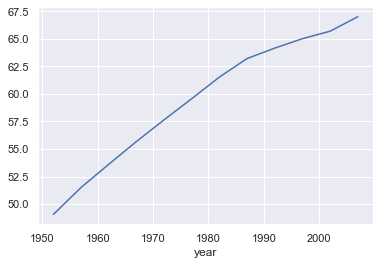

In [492]:
import matplotlib.pyplot as plt
# 연도별 평균 수명의 평균을 구하시오
df.groupby('year')['lifeExp'].mean()
df.groupby('year')['lifeExp'].mean().plot()

In [365]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [342]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [345]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [346]:
# Filterling
def filter_func(x):
    return x['data2'].std() > 4

In [361]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [359]:
df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


In [366]:
# lambda 함수
def add(a, b):
    return a + b
result = add(3,4)
print(result)

7


In [371]:
add = lambda a,b: a + b
result = add(3,4)
print(result)

7


In [375]:
# 초기값을 갖는 lambda 함수
add = lambda a,b = 10 : a + b
result = add(3)
print(result)

13


In [383]:
def addsub1(opt, a, b):
    if opt == "add":
        return a + b
    else :
        return a - b

In [384]:
print(addsub1("add", 7, 3))
print(addsub1("", 7, 3))

10
4


In [386]:
addsub = lambda opt, a, b : a + b if opt == "add" else a - b
print(addsub("add", 7, 3))
print(addsub("",7,3))

10
4


In [385]:
addsub = lambda opt, a, b : opt == "add" and a + b or a - b
print(addsub("add", 7, 3))
print(addsub("",7,3))

10
4


In [388]:
a = (1,2,3,4)
result = []
for i in a:
    if i % 2 == 0:
        result.append(i * 3)
print(result)

[6, 12]


In [390]:
result = [i * 3 for i in a if i % 2 == 0]
print(result)

[6, 12]


In [397]:
add2 = lambda opt, a, b : a + b if opt == "add" else (
                          a - b if opt == "sub" else (
                          a * b if opt == "mul" else a / b
                          ))
print(add2("add", 3, 4))
print(add2("sub", 3, 4))
print(add2("mul", 3, 4))
print(add2("", 3, 4))

7
-1
12
0.75


In [400]:
def f(x):
    return x - x.mean()

In [403]:
f = lambda x : x - x.mean()
#f(df.groupby('key'))

In [404]:
df.groupby('key').transform(f)

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [405]:
df.groupby('key').transform(lambda x : x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [407]:
df.groupby('key').apply(f)

/var/folders/7x/b03wx9fx2vgfxd_91sjglbtw0000gn/T/ipykernel_72860/4259981760.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  f = lambda x : x - x.mean()


,data1,data2,key
0,-1.5,1.0,NaN
1,-1.5,-3.5,NaN
2,-1.5,-3.0,NaN
3,1.5,-1.0,NaN
4,1.5,3.5,NaN
5,1.5,3.0,NaN


In [408]:
# Pivot table
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [409]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [412]:
# 성별에 따른 생존율
#titanic.groupby('sex').survived.mean()
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [413]:
# 성별, 좌석등급별 생존율 평균
titanic.groupby(['sex', 'class'])['survived'].mean()

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [414]:
titanic.groupby(['sex', 'class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [415]:
titanic.pivot_table('survived', index="sex", columns="class")

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [416]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [419]:
titanic['age'].max()

80.0

In [421]:
fare = pd.qcut(titanic['fare'], 2)
fare

0       (-0.001, 14.454]
1      (14.454, 512.329]
2       (-0.001, 14.454]
3      (14.454, 512.329]
4       (-0.001, 14.454]
             ...        
886     (-0.001, 14.454]
887    (14.454, 512.329]
888    (14.454, 512.329]
889    (14.454, 512.329]
890     (-0.001, 14.454]
Name: fare, Length: 891, dtype: category
Categories (2, interval[float64, right]): [(-0.001, 14.454] < (14.454, 512.329]]

In [422]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], ['class', fare])

class                      First                             Second  \
fare            (-0.001, 14.454] (14.454, 512.329] (-0.001, 14.454]   
sex    age                                                            
female (0, 18]               NaN          0.909091         1.000000   
       (18, 80]              NaN          0.972973         0.880000   
male   (0, 18]               NaN          0.800000         0.000000   
       (18, 80]              0.0          0.391304         0.098039   

class                                        Third                    
fare            (14.454, 512.329] (-0.001, 14.454] (14.454, 512.329]  
sex    age                                                            
female (0, 18]           1.000000         0.714286          0.318182  
       (18, 80]          0.914286         0.444444          0.391304  
male   (0, 18]           0.818182         0.260870          0.178571  
       (18, 80]          0.030303         0.125000          0.192308

In [423]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [424]:
titanic.pivot_table('survived', index="sex", columns="class")

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [428]:
titanic.pivot_table(index="sex", columns="class",
                   aggfunc={'survived':sum, 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [455]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [454]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [460]:
births = pd.read_csv("data/births.csv")
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [461]:
births['year']

0        1969
1        1969
2        1969
3        1969
4        1969
         ... 
15542    2008
15543    2008
15544    2008
15545    2008
15546    2008
Name: year, Length: 15547, dtype: int64

In [464]:
births['decade'] = (births['year'] // 10) * 10
births

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


In [468]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


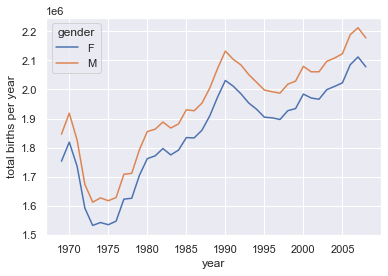

In [473]:
import matplotlib.pyplot as plt
sns.set()  # Seaborn 스타일 사용
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [476]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [477]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980


In [478]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14610 non-null  int64  
 1   month   14610 non-null  int64  
 2   day     14610 non-null  float64
 3   gender  14610 non-null  object 
 4   births  14610 non-null  int64  
 5   decade  14610 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 799.0+ KB


In [479]:
# 년(year), 월(month), 일(day)로부터 날짜(datetime) 인덱스를 생성 
births.index = pd.to_datetime(10000 * births.year + 
                             100 * births.month +
                             births.day, format="%Y%m%d")
births['dayofweek'] = births.index.dayofweek
births

/var/folders/7x/b03wx9fx2vgfxd_91sjglbtw0000gn/T/ipykernel_72860/2140284901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['dayofweek'] = births.index.dayofweek


,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1.0,F,4046,1960,2
1969-01-01,1969,1,1.0,M,4440,1960,2
1969-01-02,1969,1,2.0,F,4454,1960,3
1969-01-02,1969,1,2.0,M,4548,1960,3
1969-01-03,1969,1,3.0,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29.0,M,5944,1980,3
1988-12-30,1988,12,30.0,F,5742,1980,4
1988-12-30,1988,12,30.0,M,6095,1980,4
1988-12-31,1988,12,31.0,F,4435,1980,5


/var/folders/7x/b03wx9fx2vgfxd_91sjglbtw0000gn/T/ipykernel_72860/1730173910.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['','Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


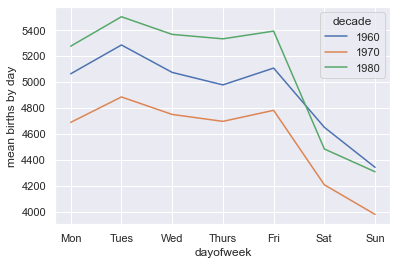

In [489]:
import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['','Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');